<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Group-indicators-into-risk-factors" data-toc-modified-id="Group-indicators-into-risk-factors-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Group indicators into risk factors</a></span></li><li><span><a href="#Explore-Indicator-availability-over-the-years" data-toc-modified-id="Explore-Indicator-availability-over-the-years-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Explore Indicator availability over the years</a></span></li><li><span><a href="#Explore-data-disagregation" data-toc-modified-id="Explore-data-disagregation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Explore data disagregation</a></span></li><li><span><a href="#Compute-zscores" data-toc-modified-id="Compute-zscores-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Compute zscores</a></span><ul class="toc-item"><li><span><a href="#Metabolic-Risk-Factor" data-toc-modified-id="Metabolic-Risk-Factor-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Metabolic Risk Factor</a></span></li><li><span><a href="#Behavorial-Risk-Factor" data-toc-modified-id="Behavorial-Risk-Factor-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Behavorial Risk Factor</a></span></li><li><span><a href="#NCD-Risk-Factor" data-toc-modified-id="NCD-Risk-Factor-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>NCD Risk Factor</a></span></li></ul></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Export-to-csv" data-toc-modified-id="Export-to-csv-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Export to csv</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualization</a></span></li></ul></li></ul></div>

## Data pre-processing

### Import data

In [2]:
import pandas as pd
df = pd.read_excel('ncd_indicators_v2.xlsx')
df.head()

,country,year,indicator,data,indicator_group,source
0,São Tome and Principe,2017,Alcohol use DALYs (Disability-Adjusted Life Ye...,2287.92,Behavioral,41
1,São Tome and Principe,2017,Dietary risks DALYs (Disability-Adjusted Life ...,3172.94,Behavioral,41
2,São Tome and Principe,2017,Low physical activity DALYs (Disability-Adjust...,264.878,Behavioral,41
3,São Tome and Principe,2017,Chronic respiratory diseases Prevalence Rate,6787.53,NCD,41
4,São Tome and Principe,2017,Cardiovascular diseases Prevalence Rate,6673.37,NCD,41


In [3]:
print('There are {} rows in the imported dataset.'.format(df.shape[0]))

There are 2280 rows in the imported dataset.


In [4]:
print('There are {} unique indicators in the imported dataset in total.'.format(df['indicator'].nunique()))

There are 12 unique indicators in the imported dataset in total.


In [5]:
dropi = df[df['country'] =='TERRITORY'].index
df.drop(dropi, inplace=True)

dropi = df[df['data']=='-'].index
df.drop(dropi, inplace=True)

In [6]:
df['year'] = df['year'].astype('int64')
df['data'] = df['data'].astype('float64')
df['data'] = df['data'].round(2)
print('colums imported and their datatypes')
df.dtypes

colums imported and their datatypes


country             object
year                 int64
indicator           object
data               float64
indicator_group     object
source               int64
dtype: object

In [7]:
df.head()

,country,year,indicator,data,indicator_group,source
0,São Tome and Principe,2017,Alcohol use DALYs (Disability-Adjusted Life Ye...,2287.92,Behavioral,41
1,São Tome and Principe,2017,Dietary risks DALYs (Disability-Adjusted Life ...,3172.94,Behavioral,41
2,São Tome and Principe,2017,Low physical activity DALYs (Disability-Adjust...,264.88,Behavioral,41
3,São Tome and Principe,2017,Chronic respiratory diseases Prevalence Rate,6787.53,NCD,41
4,São Tome and Principe,2017,Cardiovascular diseases Prevalence Rate,6673.37,NCD,41


### Group indicators into risk factors

In [8]:
print('Risk factors considered: ', df['indicator_group'].unique())

Risk factors considered:  ['Behavioral' 'NCD' 'Metabolic']


### Explore Indicator availability over the years 

In [9]:
print('The dataset has data in total {} unique countries.'.format( df['country'].nunique() ))

The dataset has data in total 193 unique countries.


In [ ]:
#df.groupby(['indicator_group','indicator','year'])['country'].nunique()

This is how the indicators data points per country are broken down: 


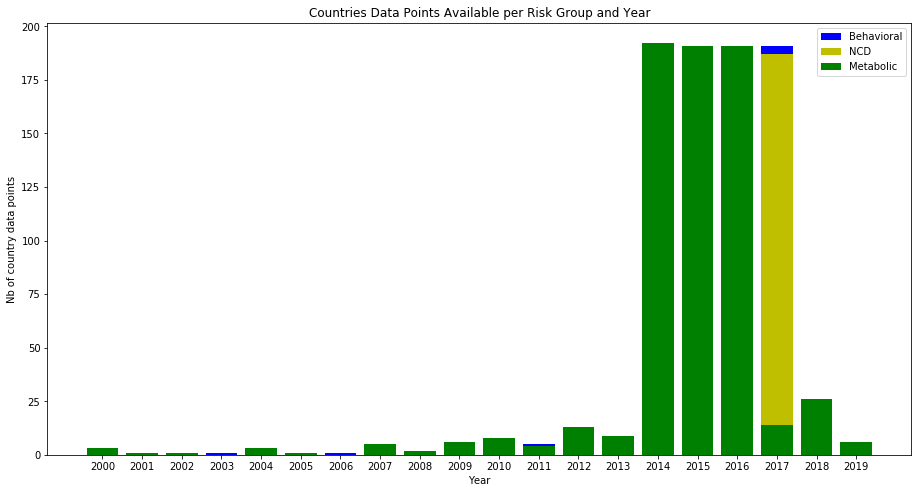

In [11]:
print('This is how the indicators data points per country are broken down: ')
#df.groupby(['indicator_group','indicator','year'])['country'].nunique()#.reset_index(name='count')

x = df.groupby(['indicator_group','year'])['country'].nunique().reset_index(name='count')

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])


# x positions of bars
x1 = x[x['indicator_group']=='Behavioral']['year']
x2 = x[x['indicator_group']=='NCD']['year']
x3 = x[(x['indicator_group']=='Metabolic') & (x['year']>=2000)]['year']


# y positions of bars

y1 = x[x['indicator_group']=='Behavioral']['count']
y2 = x[x['indicator_group']=='NCD']['count']
y3 = x[(x['indicator_group']=='Metabolic') &  (x['year']>=2000)]['count']



p1 = ax.bar(x1,y1,label='Behavioral',align='center',color = 'b')
p2 = ax.bar(x2,y2,label='NCD',align='center',color = 'y')
p3 = ax.bar(x3,y3,label='Metabolic',align='center',color = 'g')

ax.set_ylabel('Nb of country data points')
ax.set_xlabel('Year')
ax.set_title('Countries Data Points Available per Risk Group and Year')
plt.xticks(np.arange(2000, 2020, step=1))
ax.legend()
plt.show()

### Explore data disagregation

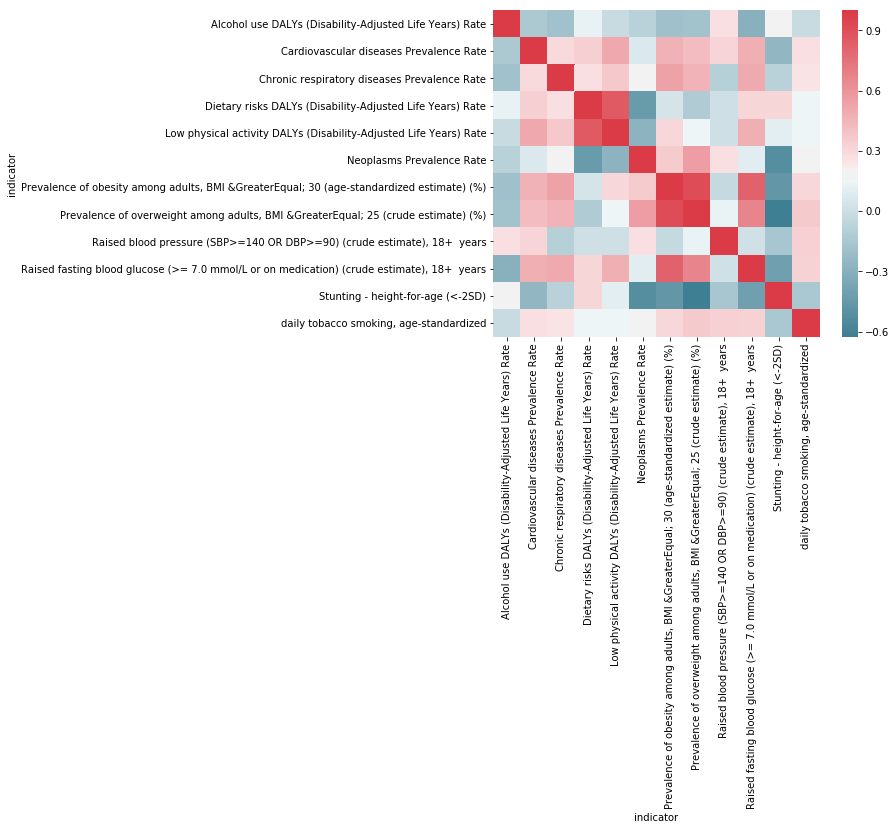

In [12]:
pivot_ind  = df.pivot(index='country', columns='indicator', values='data')


import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np

corr = pivot_ind.corr()
print(corr.style.background_gradient(cmap='coolwarm').set_precision(2))

f, ax = pl.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [13]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

### Compute zscores

#### Metabolic Risk Factor

In [14]:
df_meta = df[(df['indicator_group']=='Metabolic')]
df_meta.head()

,country,year,indicator,data,indicator_group,source
6,São Tome and Principe,2014,Raised fasting blood glucose (>= 7.0 mmol/L or...,5.6,Metabolic,33
7,São Tome and Principe,2015,Raised blood pressure (SBP>=140 OR DBP>=90) (c...,19.6,Metabolic,33
8,São Tome and Principe,2016,"Prevalence of overweight among adults, BMI &Gr...",31.6,Metabolic,33
9,São Tome and Principe,2016,"Prevalence of obesity among adults, BMI &Great...",12.4,Metabolic,33
10,São Tome and Principe,2014,Stunting - height-for-age (<-2SD),17.2,Metabolic,10


In [15]:
df_meta['country'].nunique()

193

In [16]:
len(df_meta)

915

In [17]:
df_meta['indicator'].unique()

array(['Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years',
       'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years',
       'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)',
       'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)',
       'Stunting - height-for-age (<-2SD)'], dtype=object)

In [18]:
a = df_meta[df_meta['indicator']=='Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years' ] 
b = df_meta[df_meta['indicator']=='Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years' ] 
c = df_meta[df_meta['indicator']=='Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)' ] 
#d = df_meta[df_meta['indicator']=='Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)' ] 
#e = df_meta[df_meta['indicator']=='Stunting - height-for-age (<-2SD)' ] 

common_countries = \
    set.intersection(set(a['country']), set(b['country']), set(c['country']))#,set(d['country'])) #,set(e['country']))

In [19]:
df_meta = pd.concat([
    a[a['country'].isin(common_countries)],
    b[b['country'].isin(common_countries)],
    c[c['country'].isin(common_countries)]#,
   # d[d['country'].isin(common_countries)]#,
   # e[e['country'].isin(common_countries)]
    
]).sort_values(by='country')

In [20]:
len(common_countries)

191

In [21]:
df_meta.shape

(573, 6)

In [22]:
df_metarisk=pd.DataFrame()
irange = df_meta['indicator'].unique()
df_meta.sort_values(['indicator', 'country'], ascending=True, inplace = True)

for i in irange:
    print(i)
    pivot = df_meta[df_meta['indicator']==i].pivot(index='country', columns='indicator', values='data')
    #print(pivot)
    pivot.reset_index(inplace=True)
    pivot.columns =['country', i]
    df_metarisk['country']=pivot['country']
    df_metarisk = pd.concat([df_metarisk, pivot[i]], axis=1)
    #print(df_metarisk)
    


df_metarisk.head()



Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)
Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years
Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years


,country,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years"
0,Afghanistan,19.7,8.4,23.0
1,Albania,58.7,8.3,31.6
2,Algeria,60.7,10.5,21.7
3,Andorra,68.1,9.1,24.5
4,Angola,23.9,5.6,22.3


In [23]:
df_metarisk=df_metarisk.iloc[:,0:4]

In [24]:
df_metarisk.shape

(191, 4)

In [25]:
""" cols = list(df_metarisk.columns)
cols.remove('country')
cols
for col in cols:
    col_zscore = 'zscore_' + col
    df_metarisk[col_zscore] = (df_metarisk[col] - df_metarisk[col].mean())/df_metarisk[col].std(ddof=0)
df_metarisk"""

" cols = list(df_metarisk.columns)\ncols.remove('country')\ncols\nfor col in cols:\n    col_zscore = 'zscore_' + col\n    df_metarisk[col_zscore] = (df_metarisk[col] - df_metarisk[col].mean())/df_metarisk[col].std(ddof=0)\ndf_metarisk"

In [26]:
from scipy.stats import zscore

meta_zscore= df_metarisk.iloc[:,1:5]
meta_zscore = meta_zscore.apply(zscore)
meta_zscore.head()

,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years"
0,-1.578069,-0.166132,-0.041868
1,0.555603,-0.188749,1.647851
2,0.665022,0.308819,-0.297290
3,1.069872,-0.007815,0.252851
4,-1.348289,-0.799401,-0.179403


In [27]:
len(meta_zscore)

191

In [28]:
meta_zscore['country']= df_metarisk.iloc[:,0]

In [29]:
meta_zscore.head()

,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years",country
0,-1.578069,-0.166132,-0.041868,Afghanistan
1,0.555603,-0.188749,1.647851,Albania
2,0.665022,0.308819,-0.297290,Algeria
3,1.069872,-0.007815,0.252851,Andorra
4,-1.348289,-0.799401,-0.179403,Angola


In [30]:
meta_zscore.isnull().sum()

Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)             0
Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years    0
Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years                      0
country                                                                                       0
dtype: int64

In [31]:
meta_zscore.reset_index(inplace=True)
result_meta = pd.melt(meta_zscore, id_vars=['country'], var_name=['indicator'],
        value_vars=['Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years', 
                                                      'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)',
                                                     'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years'])
                                                     #'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)'])
result_meta['indicator_group']='Metabolic'
result_meta.head()

,country,indicator,value,indicator_group
0,Afghanistan,Raised blood pressure (SBP>=140 OR DBP>=90) (c...,-0.041868,Metabolic
1,Albania,Raised blood pressure (SBP>=140 OR DBP>=90) (c...,1.647851,Metabolic
2,Algeria,Raised blood pressure (SBP>=140 OR DBP>=90) (c...,-0.297290,Metabolic
3,Andorra,Raised blood pressure (SBP>=140 OR DBP>=90) (c...,0.252851,Metabolic
4,Angola,Raised blood pressure (SBP>=140 OR DBP>=90) (c...,-0.179403,Metabolic


#### Behavorial Risk Factor

In [74]:
df_behav = df[(df['indicator_group']=='Behavioral')] 

In [75]:
df_behav['country'].nunique()

193

In [76]:
df_behav['indicator'].unique()

array(['Alcohol use DALYs (Disability-Adjusted Life Years) Rate',
       'Dietary risks DALYs (Disability-Adjusted Life Years) Rate',
       'Low physical activity DALYs (Disability-Adjusted Life Years) Rate',
       'daily tobacco smoking, age-standardized'], dtype=object)

In [77]:
a = df_behav[df_behav['indicator']=='Alcohol use DALYs (Disability-Adjusted Life Years) Rate' ] 
b = df_behav[df_behav['indicator']=='Dietary risks DALYs (Disability-Adjusted Life Years) Rate' ] 
c = df_behav[df_behav['indicator']=='Low physical activity DALYs (Disability-Adjusted Life Years) Rate' ] 
d = df_behav[df_behav['indicator']== 'daily tobacco smoking, age-standardized' ] 



common_countries_behav = \
    set.intersection( set(a['country']), set(b['country']), set(c['country']),set(d['country']))


df_behav = pd.concat([
    a[a['country'].isin(common_countries_behav)],
    b[b['country'].isin(common_countries_behav)],
   c[c['country'].isin(common_countries_behav)],
    d[d['country'].isin(common_countries_behav)]
    
]).sort_values(by='country')

In [78]:
len(d['country'])

180

In [79]:
len(common_countries_behav)

174

In [80]:
df_behrisk=pd.DataFrame()
irange = df_behav['indicator'].unique()
df_behav.sort_values(['indicator', 'country'], ascending=True, inplace = True)



for i in irange:
    pivot = df_behav[df_behav['indicator']==i].pivot(index='country', columns='indicator', values='data')
    pivot.reset_index(inplace=True)
    pivot.columns =['country', i]
    df_behrisk['country']=pivot['country']
    #df_behrisk [i] = pivot[i]
    df_behrisk = pd.concat([df_behrisk, pivot[i]], axis=1)
    


    

df_behrisk.head()


,country,Dietary risks DALYs (Disability-Adjusted Life Years) Rate,Alcohol use DALYs (Disability-Adjusted Life Years) Rate,Low physical activity DALYs (Disability-Adjusted Life Years) Rate,"daily tobacco smoking, age-standardized"
0,Afghanistan,9368.06,205.96,1173.26,6.0
1,Albania,2771.23,1223.02,249.53,23.0
2,Algeria,2963.28,172.90,471.06,12.0
3,Andorra,1142.57,940.10,155.55,28.0
4,Angola,3158.81,2376.78,305.94,6.0


In [81]:
from scipy.stats import zscore

behav_zscore= df_behrisk.iloc[:,1:5]
behav_zscore = behav_zscore.apply(zscore)
behav_zscore.head()

,Dietary risks DALYs (Disability-Adjusted Life Years) Rate,Alcohol use DALYs (Disability-Adjusted Life Years) Rate,Low physical activity DALYs (Disability-Adjusted Life Years) Rate,"daily tobacco smoking, age-standardized"
0,3.244121,-1.086710,3.888040,-1.058381
1,-0.328512,-0.197194,-0.511589,0.696491
2,-0.224503,-1.115624,0.543535,-0.439015
3,-1.210542,-0.444635,-0.959206,1.212630
4,-0.118611,0.811879,-0.242914,-1.058381


In [40]:
behav_zscore.shape

(174, 3)

In [82]:
behav_zscore['country'] = df_behrisk.iloc[:,0]
behav_zscore.reset_index(inplace=True)
result_beha = pd.melt(behav_zscore, id_vars=['country'], var_name=['indicator'],
        value_vars=['Dietary risks DALYs (Disability-Adjusted Life Years) Rate', 
                                                      'Alcohol use DALYs (Disability-Adjusted Life Years) Rate',
                                                     'Low physical activity DALYs (Disability-Adjusted Life Years) Rate',
                                                    'daily tobacco smoking, age-standardized'])
result_beha['indicator_group']='Behavioral'
result_beha.head()

,country,indicator,value,indicator_group
0,Afghanistan,Dietary risks DALYs (Disability-Adjusted Life ...,3.244121,Behavioral
1,Albania,Dietary risks DALYs (Disability-Adjusted Life ...,-0.328512,Behavioral
2,Algeria,Dietary risks DALYs (Disability-Adjusted Life ...,-0.224503,Behavioral
3,Andorra,Dietary risks DALYs (Disability-Adjusted Life ...,-1.210542,Behavioral
4,Angola,Dietary risks DALYs (Disability-Adjusted Life ...,-0.118611,Behavioral


#### NCD Risk Factor

In [42]:
df_ncd = df[(df['indicator_group']=='NCD')]
df_ncd.head()

,country,year,indicator,data,indicator_group,source
3,São Tome and Principe,2017,Chronic respiratory diseases Prevalence Rate,6787.53,NCD,41
4,São Tome and Principe,2017,Cardiovascular diseases Prevalence Rate,6673.37,NCD,41
5,São Tome and Principe,2017,Neoplasms Prevalence Rate,529.07,NCD,41
14,Turkey,2017,Chronic respiratory diseases Prevalence Rate,9763.09,NCD,41
15,Turkey,2017,Cardiovascular diseases Prevalence Rate,6635.77,NCD,41


In [43]:
df_ncd.isnull().sum()

country            0
year               0
indicator          0
data               0
indicator_group    0
source             0
dtype: int64

In [44]:
df_ncd['country'].nunique()

187

In [45]:
df_ncd['indicator'].unique()

array(['Chronic respiratory diseases Prevalence Rate',
       'Cardiovascular diseases Prevalence Rate',
       'Neoplasms Prevalence Rate'], dtype=object)

In [46]:
a = df_ncd[df_ncd['indicator']=='Chronic respiratory diseases Prevalence Rate' ] 
b = df_ncd[df_ncd['indicator']=='Cardiovascular diseases Prevalence Rate'  ] 
c = df_ncd[df_ncd['indicator']=='Neoplasms Prevalence Rate' ] 


common_countries_ncd = \
    set.intersection(set(a['country']), set(b['country']), set(c['country']))


df_ncd = pd.concat([
    a[a['country'].isin(common_countries_ncd)],
    b[b['country'].isin(common_countries_ncd)],
    c[c['country'].isin(common_countries_ncd)]
    
]).sort_values(by='country')

In [47]:
len(common_countries_ncd)

187

In [48]:
df_ncd.isnull().sum()

country            0
year               0
indicator          0
data               0
indicator_group    0
source             0
dtype: int64

In [49]:
df_ncdrisk=pd.DataFrame()
irange = df_ncd['indicator'].unique()
df_ncd.sort_values(['indicator', 'country'], ascending=True, inplace = True)

for i in irange:
    print(i)
    pivot = df_ncd[df_ncd['indicator']==i].pivot(index='country', columns='indicator', values='data')
    pivot.reset_index(inplace=True)
    pivot.columns =['country', i]
    df_ncdrisk['country']=pivot['country']
    #df_ncd [i] = pivot[i]
    df_ncdrisk = pd.concat([df_ncdrisk, pivot[i]], axis=1)
    
    
df_ncdrisk.head()

Neoplasms Prevalence Rate
Chronic respiratory diseases Prevalence Rate
Cardiovascular diseases Prevalence Rate


,country,Neoplasms Prevalence Rate,Chronic respiratory diseases Prevalence Rate,Cardiovascular diseases Prevalence Rate
0,Afghanistan,517.13,10276.11,8037.17
1,Albania,1098.91,6560.34,8261.24
2,Algeria,547.41,8862.75,7104.67
3,Andorra,2208.02,9230.26,6218.41
4,Angola,417.83,7750.04,5628.76


In [50]:
ncd_zscore= df_ncdrisk.iloc[:,1:5]
ncd_zscore = ncd_zscore.apply(zscore)
ncd_zscore.head()

,Neoplasms Prevalence Rate,Chronic respiratory diseases Prevalence Rate,Cardiovascular diseases Prevalence Rate
0,-0.672595,1.179129,2.209483
1,0.108444,-0.772627,2.500656
2,-0.631944,0.436743,0.997727
3,1.597424,0.629782,-0.153941
4,-0.805905,-0.147722,-0.920173


In [51]:
ncd_zscore.shape

(187, 3)

In [52]:
ncd_zscore['country'] = df_ncdrisk.iloc[:,0]
ncd_zscore.reset_index(inplace=True)
result_ncd = pd.melt(ncd_zscore, id_vars=['country'], var_name=['indicator'],
        value_vars=['Neoplasms Prevalence Rate', 
                                                      'Chronic respiratory diseases Prevalence Rate',
                                                     'Cardiovascular diseases Prevalence Rate'
                                                ])
result_ncd['indicator_group']='NCD'
result_ncd.head()

,country,indicator,value,indicator_group
0,Afghanistan,Neoplasms Prevalence Rate,-0.672595,NCD
1,Albania,Neoplasms Prevalence Rate,0.108444,NCD
2,Algeria,Neoplasms Prevalence Rate,-0.631944,NCD
3,Andorra,Neoplasms Prevalence Rate,1.597424,NCD
4,Angola,Neoplasms Prevalence Rate,-0.805905,NCD


In [83]:
result = result_ncd.append([result_beha, result_meta])
result['value']=result['value'].round(2)
result.head()

,country,indicator,value,indicator_group
0,Afghanistan,Neoplasms Prevalence Rate,-0.67,NCD
1,Albania,Neoplasms Prevalence Rate,0.11,NCD
2,Algeria,Neoplasms Prevalence Rate,-0.63,NCD
3,Andorra,Neoplasms Prevalence Rate,1.60,NCD
4,Angola,Neoplasms Prevalence Rate,-0.81,NCD


In [84]:
result.shape

(1830, 4)

In [85]:
result['indicator_group'].value_counts()

Behavioral    696
Metabolic     573
NCD           561
Name: indicator_group, dtype: int64

## Results

### Export to csv

In [86]:
result.to_csv('res.csv')

### Visualization

In [87]:
pivot = result.pivot(index='country', columns='indicator', values='value')
#pivot.reset_index()
pivot = pivot.reset_index(drop=False)
pivot.head()

indicator,country,Alcohol use DALYs (Disability-Adjusted Life Years) Rate,Cardiovascular diseases Prevalence Rate,Chronic respiratory diseases Prevalence Rate,Dietary risks DALYs (Disability-Adjusted Life Years) Rate,Low physical activity DALYs (Disability-Adjusted Life Years) Rate,Neoplasms Prevalence Rate,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years","daily tobacco smoking, age-standardized"
0,Afghanistan,-1.09,2.21,1.18,3.24,3.89,-0.67,-1.58,-0.04,-0.17,-1.06
1,Albania,-0.20,2.50,-0.77,-0.33,-0.51,0.11,0.56,1.65,-0.19,0.70
2,Algeria,-1.12,1.00,0.44,-0.22,0.54,-0.63,0.67,-0.30,0.31,-0.44
3,Andorra,-0.44,-0.15,0.63,-1.21,-0.96,1.60,1.07,0.25,-0.01,1.21
4,Angola,0.81,-0.92,-0.15,-0.12,-0.24,-0.81,-1.35,-0.18,-0.80,-1.06


In [88]:
pivot.shape

(193, 11)

In [89]:
pivot.isnull().sum()

indicator
country                                                                                        0
Alcohol use DALYs (Disability-Adjusted Life Years) Rate                                       19
Cardiovascular diseases Prevalence Rate                                                        6
Chronic respiratory diseases Prevalence Rate                                                   6
Dietary risks DALYs (Disability-Adjusted Life Years) Rate                                     19
Low physical activity DALYs (Disability-Adjusted Life Years) Rate                             19
Neoplasms Prevalence Rate                                                                      6
Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)              2
Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years                       2
Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years     2
daily tobacco smokin

In [90]:
missing = pivot[pivot.isnull().any(axis=1)]
missing.to_csv('missing.csv')

In [91]:
pivot = pivot.dropna() 

In [92]:
pivot.isnull().sum()

indicator
country                                                                                       0
Alcohol use DALYs (Disability-Adjusted Life Years) Rate                                       0
Cardiovascular diseases Prevalence Rate                                                       0
Chronic respiratory diseases Prevalence Rate                                                  0
Dietary risks DALYs (Disability-Adjusted Life Years) Rate                                     0
Low physical activity DALYs (Disability-Adjusted Life Years) Rate                             0
Neoplasms Prevalence Rate                                                                     0
Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)             0
Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years                      0
Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years    0
daily tobacco smoking, age-sta

In [93]:
pivot.shape

(173, 11)

In [94]:
pivot['score'] = pivot.mean(axis=1).round(2)

In [95]:
#pivot['Low physical activity DALYs (Disability-Adjusted Life Years) Rate']=pivot['Low physical activity DALYs (Disability-Adjusted Life Years) Rate']*-1

In [96]:
score_min = pivot['score'].min()
score_max= pivot['score'].max()

In [97]:
pivot['score_norm'] = (((pivot['score'] - score_min) / (score_max - score_min))*100).round(2)
pivot['rank']= pivot['score_norm'].rank(ascending=False)

In [98]:
pivot.head()
pivot['score_norm'].min()

0.0

In [104]:
df[df['country']=='Nigeria']

,country,year,indicator,data,indicator_group,source
750,Nigeria,2017,Alcohol use DALYs (Disability-Adjusted Life Ye...,1350.25,Behavioral,41
751,Nigeria,2017,Dietary risks DALYs (Disability-Adjusted Life ...,1766.82,Behavioral,41
752,Nigeria,2017,Low physical activity DALYs (Disability-Adjust...,185.60,Behavioral,41
753,Nigeria,2017,Chronic respiratory diseases Prevalence Rate,5928.49,NCD,41
754,Nigeria,2017,Cardiovascular diseases Prevalence Rate,5745.62,NCD,41
755,Nigeria,2017,Neoplasms Prevalence Rate,564.09,NCD,41
756,Nigeria,2014,Raised fasting blood glucose (>= 7.0 mmol/L or...,4.30,Metabolic,33
757,Nigeria,2015,Raised blood pressure (SBP>=140 OR DBP>=90) (c...,18.20,Metabolic,33
758,Nigeria,2016,"Prevalence of overweight among adults, BMI &Gr...",26.00,Metabolic,33
759,Nigeria,2016,"Prevalence of obesity among adults, BMI &Great...",8.90,Metabolic,33


In [99]:
pivot.to_csv('ranks.csv')
pivot.sort_values(by=['rank'])

indicator,country,Alcohol use DALYs (Disability-Adjusted Life Years) Rate,Cardiovascular diseases Prevalence Rate,Chronic respiratory diseases Prevalence Rate,Dietary risks DALYs (Disability-Adjusted Life Years) Rate,Low physical activity DALYs (Disability-Adjusted Life Years) Rate,Neoplasms Prevalence Rate,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years","daily tobacco smoking, age-standardized",score,score_norm,rank
90,Kiribati,-0.57,1.31,2.85,3.21,2.34,-0.47,1.61,-0.49,2.91,2.97,1.57,100.00,1.0
132,Papua New Guinea,1.28,0.76,4.69,3.64,2.74,-0.58,0.04,-0.57,0.60,2.86,1.55,99.19,2.0
107,Marshall Islands,-0.93,0.90,2.12,3.24,3.13,-0.33,1.87,-0.55,2.62,0.39,1.25,86.99,3.0
179,Ukraine,3.64,-0.04,-0.44,1.63,2.58,0.66,0.73,1.81,-0.01,0.70,1.13,82.11,4.0
111,Micronesia (Federated States of),-1.08,0.84,2.66,2.38,2.37,-0.52,1.18,-0.53,2.01,1.94,1.12,81.71,5.0
25,Bulgaria,0.29,3.16,-0.06,0.72,0.44,0.75,0.97,2.57,0.26,1.52,1.06,79.27,6.0
172,Tonga,-1.02,1.88,3.50,0.63,0.63,-0.22,1.48,-0.34,2.89,1.01,1.04,78.46,7.0
60,Fiji,-0.73,1.60,2.21,2.54,2.50,-0.43,0.81,-0.57,1.69,0.08,0.97,75.61,8.0
147,Samoa,-0.83,1.13,2.45,0.72,1.01,-0.66,1.45,-0.24,3.09,0.70,0.88,71.95,9.0
142,Russian Federation,2.44,0.08,-0.77,0.79,1.67,0.84,0.69,1.67,0.04,1.11,0.86,71.14,10.0


In [ ]:
#!pip install geopy

In [105]:
# use geocoder to fetch the lat and lng of cities with locations that do not have a Trader Joe's
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

lat=[]
lng=[]


for c in pivot['country']:
    address = c
    #print(c)
    
    geolocator = Nominatim(user_agent="explorer",timeout=4)
    #RateLimiter allows to perform bulk operations while gracefully handling error responses and adding delays when needed.
    #to avoid: urlopen error timed
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=4)
    location = geolocator.geocode(address)
    lat.append(location.latitude)
    lng.append(location.longitude)
    
    
pivot['Latitude']=lat
pivot['Longitude']=lng

In [113]:
#import chart_studio.plotly as py
#import chart_studio.plotly as py
#chart_studio.tools.set_credentials_file(username='gse19', api_key='fRRwM3lCSmBMO6L2zTEp')

import plotly.graph_objects as go


pivot['text'] = pivot['country'] + " Score: " + pivot["score_norm"].astype(str) + " Rank: " +  pivot["rank"].astype(str)
fig = go.Figure(data = go.Scattergeo(
    lon = pivot["Longitude"],
    lat = pivot["Latitude"],
    text = pivot["text"],
    mode = "markers",
    marker = dict(
        size = 10,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = True,
        symbol = 'circle',
        line = dict(
            width = 1,
            color = 'rgba(102, 102, 102)'
        ),
        cmin = pivot["score_norm"].min(),
        color = pivot["score_norm"],
        cmax = pivot["score_norm"].max(),
        colorbar_title = "Vulnerability Index for Countries Around the World"
    )
))

fig.update_layout(
    title = "Vulnerability Index for Countries Around the World",
    geo = dict(
        scope = "world",
        showland = True,
    )
)

fig.write_html('first_figure.html', auto_open=True)
fig.show()
#py.iplot(fig, filename = 'Vulnerability Index', auto_open=True)

In [123]:
#!pip install chart-studio

In [133]:
#!pip install dash==1.12.0

In [130]:
#!pip install "notebook>=5.3" "ipywidgets>=7.2"

In [131]:
#!pip install plotly==4.8.1

In [126]:
#!pip install chart-studio==1.0.0

In [134]:
#import chart_studio.plotly as py

import chart_studio.plotly
chart_studio.tools.set_credentials_file(username='gse19', api_key='fRRwM3lCSmBMO6L2zTEp')

import plotly.graph_objects as go


pivot['text'] = pivot['country'] + " Score: " + pivot["score_norm"].astype(str) + " Rank: " +  pivot["rank"].astype(str)
fig = go.Figure(data = go.Scattergeo(
    lon = pivot["Longitude"],
    lat = pivot["Latitude"],
    text = pivot["text"],
    mode = "markers",
    marker = dict(
        size = 10,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = True,
        symbol = 'circle',
        line = dict(
            width = 1,
            color = 'rgba(102, 102, 102)'
        ),
        cmin = pivot["score_norm"].min(),
        color = pivot["score_norm"],
        cmax = pivot["score_norm"].max(),
        colorbar_title = "Vulnerability Index for Countries Around the World"
    )
))

fig.update_layout(
    title = "Vulnerability Index for Countries Around the World",
    geo = dict(
        scope = "world",
        showland = True,
    )
)

#fig.write_html('first_figure.html', auto_open=True)
#fig.show()
#py.iplot(fig, filename = 'Vulnerability', auto_open=True)


In [143]:
#!pip install dash ==0.37.0

ERROR: Invalid requirement: '==0.37.0'
You should consider upgrading via the 'pip install --upgrade pip' command.


In [142]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)

ImportError: No module named 'dash_core_components'

In [ ]:

""" import glob
import os
os.environ['REQUESTS_CA_BUNDLE'] = '/home/nbuser/library'

import chart_studio.plotly as py
chart_studio.tools.set_credentials_file(username='gse19', api_key='VmXO0YylSwq600juA3pr')

import plotly.graph_objects as go


pivot['text'] = pivot['country'] + " " + pivot["score_norm"].astype(str) + " " +  pivot["rank"].astype(str)

       
       
data = go.Scattergeo(
    lon = pivot["Longitude"],
    lat = pivot["Latitude"],
    text = pivot["text"],
    mode = "markers",
    marker = dict(
        size = 10,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = True,
        symbol = 'circle',
        line = dict(
            width = 1,
            color = 'rgba(102, 102, 102)'
        ),
        #cmin = pivot["score_norm"].min(),
        #color = pivot["score_norm"],
        #cmax = pivot["score_norm"].max(),
        #colorbar_title = "Vulnerability Index for Countries Around the World"
    )
)

layout = go.Layout(
    title = "Vulnerability Index for Countries Around the World",
   # geo = dict(
   #     scope = "world",
   #     showland = True,
   # )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'Vulnerability Index', auto_open=True)
"""

In [ ]:
#os.getcwd()